In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
payoff_p1 = np.array([[0,3], [1,2]])
payoff_p2 = np.array([[0,1], [3,2]])
print(payoff_p1)
print(payoff_p2)

[[0 3]
 [1 2]]
[[0 1]
 [3 2]]


In [39]:
#Playing strategies and receiving payoffs
def play(a1, a2):
    return payoff_p1[a1, a2], payoff_p2[a1, a2]

In [42]:
print(play(0,1))
print(play(1,0))
print(play(0,0))
print(play(1,1))

(3, 1)
(1, 3)
(0, 0)
(2, 2)


In [54]:
def expected_payoff_p1(p_opponent_S, action):
    return payoff_p1[action, 0] * p_opponent_S + payoff_p1[action, 1] * (1 - p_opponent_S)

In [55]:
print(expected_payoff_p1(0.75,1))

1.25


In [69]:
def expected_payoff_p2(p_opponent_S, action):
    return payoff_p2[0, action] * p_opponent_S + payoff_p2[1, action] * (1 - p_opponent_S)

In [79]:
def best_action_p1(p_opponent_S):
    payoff_if_S = expected_payoff_p1(p_opponent_S, 0)
    payoff_if_W = expected_payoff_p1(p_opponent_S, 1)
    if payoff_if_S > payoff_if_W:
        return 0  # S
    else:
        return 1  # W

In [81]:
print(best_action_p1(0.90))

1


In [71]:
print(expected_payoff_p2(0.2,1))

1.8


In [72]:
def best_action_p2(p_opponent_S):
    payoff_if_S = expected_payoff_p2(p_opponent_S, 0)
    payoff_if_W = expected_payoff_p2(p_opponent_S, 1)
    if payoff_if_S > payoff_if_W:
        return 0  # S
    else:
        return 1  # W

In [75]:
print(best_action_p2(0.35))

0


In [92]:
p1_belief = 0.2
p2_belief = 0.7

for iteration in range(10):
    payoff_S = expected_payoff_p1(p2_belief, 0)
    payoff_W = expected_payoff_p1(p2_belief, 1)
    if payoff_S > payoff_W:
        action_p1 = 0 # S
    else:
        action_p1 = 1 # W

    payoff_S = expected_payoff_p2(p1_belief, 0)
    payoff_W = expected_payoff_p2(p1_belief, 1)
    if payoff_S > payoff_W:
        action_p2 = 0 # S
    else:
        action_p2 = 1 # W  

    p1_belief = action_p2
    p2_belief = action_p1

    print(f"Round{iteration}: P1 plays {action_p1}, P2 plays {action_p2}")
    print(f"Beliefs -> P1: {p1_belief}, P2: {p2_belief}")

Round0: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round1: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round2: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round3: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round4: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round5: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round6: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round7: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round8: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1
Round9: P1 plays 1, P2 plays 0
Beliefs -> P1: 0, P2: 1


In [93]:
class ChickenGame:
    def __init__(self, C=10, R=2, L=1):
        self.payoff_p1 = np.array([[-C, R],
                                   [-L, 0]])
        self.payoff_p2 = np.array([[-C, -L],
                                 [R, 0]])
    def step(self, a1, a2):
        return self.payoff_p1[a1, a2], self.payoff_p2[a1, a2]

In [95]:
### --- parameters ---
N = 100000   # number of rounds
C, R, L = 10, 2, 1  # crash, reward, loss costs

### payoff matrices
payoff_p1 = np.array([[-C,  R],
                      [-L, 0]])
payoff_p2 = np.array([[-C, -L],
                      [ R,  0]])

def play(a1, a2):
    return payoff_p1[a1, a2], payoff_p2[a1, a2]

### --- counters ---
p1_S_count = 0
p2_S_count = 0
total_r1 = 0
total_r2 = 0

### --- simulation loop ---
for t in range(N):
    # random actions (0=Straight, 1=Swerve)
    a1 = np.random.choice([0, 1])
    a2 = np.random.choice([0, 1])

    # update S counts
    if a1 == 0:
        p1_S_count += 1
    if a2 == 0:
        p2_S_count += 1

    # get rewards
    r1, r2 = play(a1, a2)

    # update totals
    total_r1 += r1
    total_r2 += r2

### --- empirical frequencies ---
p1_freq_S = p1_S_count / N
p2_freq_S = p2_S_count / N

avg_r1 = total_r1 / N
avg_r2 = total_r2 / N

print("P1 %Straight:", p1_freq_S)
print("P2 %Straight:", p2_freq_S)
print("P1 avg reward:", avg_r1)
print("P2 avg reward:", avg_r2)

### --- KL divergence vs Nash ---
p_star = R / (C - L + R)  # equilibrium Straight prob
target_dist = [p_star, 1 - p_star]

# empirical distributions
emp_p1 = [p1_freq_S, 1 - p1_freq_S]
emp_p2 = [p2_freq_S, 1 - p2_freq_S]

def kl_divergence(q, p):
    d = 0
    for qi, pi in zip(q, p):
        if qi > 0:  # avoid log(0)
            d += qi * np.log(qi / pi)
    return d

print("P1 KL vs Nash:", kl_divergence(emp_p1, target_dist))
print("P2 KL vs Nash:", kl_divergence(emp_p2, target_dist))


P1 %Straight: 0.50007
P2 %Straight: 0.50005
P1 avg reward: -2.25563
P2 avg reward: -2.25569
P1 KL vs Nash: 0.2596675085081174
P2 KL vs Nash: 0.25963742216018176


In [126]:
N = 200000
alpha = 0.05 #learning rate
epsilon_start = 0.2
epsilon_end = 0.05

C, R, L = 10, 2, 1

payoff_p1 = np.array([[-C,  R],
                      [-L,  0]])
payoff_p2 = np.array([[-C, -L],
                      [ R,  0]])

def play(a1, a2):
    return payoff_p1[a1, a2], payoff_p2[a1, a2]

Q1 = np.zeros(2)
Q2 = np.zeros(2)

p1_S_count = 0
p2_S_count = 0

def epsilon_greedy(Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice([0,1])
    else:
        return np.argmax(Q)

In [127]:
p1_S_count = 0
p2_S_count = 0
p1_actions = []
p2_actions = []
p1_rewards = []
p2_rewards = []

for t in range(N):
    epsilon = epsilon_start - (epsilon_start - epsilon_end) * (t / N)

    a1 = epsilon_greedy(Q1, epsilon)
    a2 = epsilon_greedy(Q2, epsilon)
    
    if a1 == 0: p1_S_count += 1
    if a2 == 0: p2_S_count += 1
    
    # get rewards
    r1, r2 = play(a1, a2)
    
    Q1[a1] = Q1[a1] + alpha * (r1 - Q1[a1])
    Q2[a2] = Q2[a2] + alpha * (r2 - Q2[a2])

    p1_actions.append(a1)
    p2_actions.append(a2)
    p1_rewards.append(r1)
    p2_rewards.append(r2)
    
    if (t+1) % 1000 ==0:
        print(f"Round {t+1}: P1 plays {'S' if a1==0 else 'W'}, P2 plays {'S' if a2==0 else 'W'} | Rewards: P1={r1}, P2={r2}")




p1_freq_S = p1_S_count / N
p2_freq_S = p2_S_count / N




print("P1 %Straight:", p1_freq_S)
print("P2 %Straight:", p2_freq_S)

p_star = R / (C - L + R)
print("Equilibrium %Straight:", p_star)

Round 1000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 2000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 3000: P1 plays W, P2 plays W | Rewards: P1=0, P2=0
Round 4000: P1 plays S, P2 plays S | Rewards: P1=-10, P2=-10
Round 5000: P1 plays W, P2 plays W | Rewards: P1=0, P2=0
Round 6000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 7000: P1 plays W, P2 plays W | Rewards: P1=0, P2=0
Round 8000: P1 plays W, P2 plays W | Rewards: P1=0, P2=0
Round 9000: P1 plays W, P2 plays W | Rewards: P1=0, P2=0
Round 10000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 11000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 12000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 13000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 14000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 15000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 16000: P1 plays S, P2 plays W | Rewards: P1=2, P2=-1
Round 17000: P1 plays S, P2 plays S | Rewards: P1=-10, P2=-10
Round

In [128]:
window = 1000
def running_average(actions, window):
    arr = np.array(actions)
    return np.convolve(arr ==0, np.ones(window)/window, mode='valid')

p1_percent_straight = running_average(p1_actions, window)
p2_percent_straight = running_average(p2_actions, window)

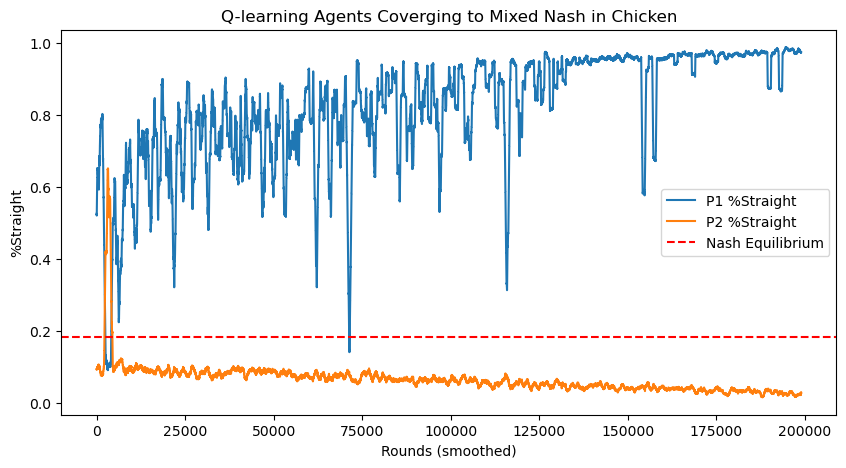

In [129]:
plt.figure(figsize=(10,5))
plt.plot(p1_percent_straight, label='P1 %Straight')
plt.plot(p2_percent_straight, label='P2 %Straight')
plt.axhline(y=p_star, color='r', linestyle='--', label='Nash Equilibrium')
plt.xlabel('Rounds (smoothed)')
plt.ylabel('%Straight')
plt.title('Q-learning Agents Coverging to Mixed Nash in Chicken')
plt.legend()
plt.show()